In [66]:
import pandas as pd
import numpy as np
import requests
from dotenv import load_dotenv
import os
from pprint import pprint
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

In [67]:
load_dotenv("../.env")

True

In [68]:
TOKEN = os.getenv("TOKEN")

In [69]:
pd.set_option("display.max_columns", None)

In [70]:
replay_url = "https://ballchasing.com/api/groups/all-blcs-2-games-12x79igbdo"
headers = {
    'Authorization': TOKEN
}

response = requests.get(replay_url, headers=headers)
response

<Response [200]>

In [71]:
url = 'https://ballchasing.com/group/all-blcs-2-games-12x79igbdo/teams-stats'

response_bs = requests.get(url)

html_content = response_bs.text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table in the HTML
table = soup.find('table', {'class': 'stats-table'})

# Ensure the table was found
if table:
    # Extract headers
    headers = []
    for th in table.find('thead').find_all('th'):
        header = th.text.strip()
        headers.append(header)

    # Extract rows
    rows = []
    for tr in table.find('tbody').find_all('tr'):
        cells = tr.find_all(['td', 'th'])
        row = [cell.text.strip() for cell in cells]
        rows.append(row)

    # Create a DataFrame
    df_bs = pd.DataFrame(rows, columns=headers)

df_bs

,Team,Games,Win %,Score,Shots,Goals,ShootingPercentage,ShotsConceded,GoalsConceded,Assists,Saves,DemosInflicted,DemosTaken
0,BECKYARDIGANS\n \n\n ...,8,62.50 %,1218.50,11.00,3.38,30.68 %,6.88,2.50,2.25,3.50,2.38,1.50
1,KILLER BS\n \n\n ...,12,58.33 %,994.42,7.92,2.17,27.37 %,7.25,2.08,1.33,3.75,3.67,3.92
2,EXECUTIVE PROJEC\n \n\n...,14,42.86 %,962.14,7.00,2.14,30.61 %,7.79,2.57,1.43,3.79,3.14,3.29
3,MINORITIES\n \n\n ...,8,50.00 %,1073.25,6.25,1.88,30.00 %,8.50,1.38,1.38,5.50,3.62,3.12
4,WONDER PETS\n \n\n ...,14,42.86 %,991.29,6.43,1.86,28.89 %,8.50,2.00,1.00,4.86,2.57,2.29
5,WONDER PETS\n \n\n ...,1,100.00 %,918.00,6.00,2.00,33.33 %,5.00,0.00,1.00,3.00,0.00,3.00
6,PUSHIN PULLIS\n \n\n ...,12,25.00 %,942.92,7.00,1.58,22.62 %,9.17,3.00,0.92,4.42,2.75,2.17
7,DIDDLERS\n \n\n ...,15,53.33 %,1020.53,8.00,2.13,26.67 %,6.60,2.07,1.60,3.60,2.80,2.60
8,SCAVS\n \n\n ...,14,64.29 %,1099.00,8.57,2.29,26.67 %,7.07,1.57,1.86,4.43,1.64,2.86


In [72]:
df_bs.iloc[:]

,Team,Games,Win %,Score,Shots,Goals,ShootingPercentage,ShotsConceded,GoalsConceded,Assists,Saves,DemosInflicted,DemosTaken
0,BECKYARDIGANS\n \n\n ...,8,62.50 %,1218.50,11.00,3.38,30.68 %,6.88,2.50,2.25,3.50,2.38,1.50
1,KILLER BS\n \n\n ...,12,58.33 %,994.42,7.92,2.17,27.37 %,7.25,2.08,1.33,3.75,3.67,3.92
2,EXECUTIVE PROJEC\n \n\n...,14,42.86 %,962.14,7.00,2.14,30.61 %,7.79,2.57,1.43,3.79,3.14,3.29
3,MINORITIES\n \n\n ...,8,50.00 %,1073.25,6.25,1.88,30.00 %,8.50,1.38,1.38,5.50,3.62,3.12
4,WONDER PETS\n \n\n ...,14,42.86 %,991.29,6.43,1.86,28.89 %,8.50,2.00,1.00,4.86,2.57,2.29
5,WONDER PETS\n \n\n ...,1,100.00 %,918.00,6.00,2.00,33.33 %,5.00,0.00,1.00,3.00,0.00,3.00
6,PUSHIN PULLIS\n \n\n ...,12,25.00 %,942.92,7.00,1.58,22.62 %,9.17,3.00,0.92,4.42,2.75,2.17
7,DIDDLERS\n \n\n ...,15,53.33 %,1020.53,8.00,2.13,26.67 %,6.60,2.07,1.60,3.60,2.80,2.60
8,SCAVS\n \n\n ...,14,64.29 %,1099.00,8.57,2.29,26.67 %,7.07,1.57,1.86,4.43,1.64,2.86


In [73]:
json = response.json()
df = pd.json_normalize(
    json,
    record_path=["players"],
)

In [74]:
df.sort_values(by="team")

,platform,id,name,team,cumulative.games,cumulative.wins,cumulative.win_percentage,cumulative.play_duration,cumulative.core.shots,cumulative.core.shots_against,cumulative.core.goals,cumulative.core.goals_against,cumulative.core.saves,cumulative.core.assists,cumulative.core.score,cumulative.core.mvp,cumulative.core.shooting_percentage,cumulative.boost.bpm,cumulative.boost.bcpm,cumulative.boost.avg_amount,cumulative.boost.amount_collected,cumulative.boost.amount_stolen,cumulative.boost.amount_collected_big,cumulative.boost.amount_stolen_big,cumulative.boost.amount_collected_small,cumulative.boost.amount_stolen_small,cumulative.boost.count_collected_big,cumulative.boost.count_stolen_big,cumulative.boost.count_collected_small,cumulative.boost.count_stolen_small,cumulative.boost.time_zero_boost,cumulative.boost.percent_zero_boost,cumulative.boost.time_full_boost,cumulative.boost.percent_full_boost,cumulative.boost.amount_overfill,cumulative.boost.amount_overfill_stolen,cumulative.boost.amount_used_while_supersonic,cumulative.boost.time_boost_0_25,cumulative.boost.time_boost_25_50,cumulative.boost.time_boost_50_75,cumulative.boost.time_boost_75_100,cumulative.boost.percent_boost_0_25,cumulative.boost.percent_boost_25_50,cumulative.boost.percent_boost_50_75,cumulative.boost.percent_boost_75_100,cumulative.movement.avg_speed,cumulative.movement.total_distance,cumulative.movement.time_supersonic_speed,cumulative.movement.time_boost_speed,cumulative.movement.time_slow_speed,cumulative.movement.time_ground,cumulative.movement.time_low_air,cumulative.movement.time_high_air,cumulative.movement.time_powerslide,cumulative.movement.count_powerslide,cumulative.movement.avg_powerslide_duration,cumulative.movement.avg_speed_percentage,cumulative.movement.percent_slow_speed,cumulative.movement.percent_boost_speed,cumulative.movement.percent_supersonic_speed,cumulative.movement.percent_ground,cumulative.movement.percent_low_air,cumulative.movement.percent_high_air,cumulative.positioning.avg_distance_to_ball,cumulative.positioning.avg_distance_to_ball_possession,cumulative.positioning.avg_distance_to_ball_no_possession,cumulative.positioning.time_defensive_third,cumulative.positioning.time_neutral_third,cumulative.positioning.time_offensive_third,cumulative.positioning.time_defensive_half,cumulative.positioning.time_offensive_half,cumulative.positioning.time_behind_ball,cumulative.positioning.time_infront_ball,cumulative.positioning.time_most_back,cumulative.positioning.time_most_forward,cumulative.positioning.goals_against_while_last_defender,cumulative.positioning.time_closest_to_ball,cumulative.positioning.time_farthest_from_ball,cumulative.positioning.percent_defensive_third,cumulative.positioning.percent_offensive_third,cumulative.positioning.percent_neutral_third,cumulative.positioning.percent_defensive_half,cumulative.positioning.percent_offensive_half,cumulative.positioning.percent_behind_ball,cumulative.positioning.percent_infront_ball,cumulative.demo.inflicted,cumulative.demo.taken,game_average.core.shots,game_average.core.shots_against,game_average.core.goals,game_average.core.goals_against,game_average.core.saves,game_average.core.assists,game_average.core.score,game_average.core.mvp,game_average.core.shooting_percentage,game_average.boost.bpm,game_average.boost.bcpm,game_average.boost.avg_amount,game_average.boost.amount_collected,game_average.boost.amount_stolen,game_average.boost.amount_collected_big,game_average.boost.amount_stolen_big,game_average.boost.amount_collected_small,game_average.boost.amount_stolen_small,game_average.boost.count_collected_big,game_average.boost.count_stolen_big,game_average.boost.count_collected_small,game_average.boost.count_stolen_small,game_average.boost.time_zero_boost,game_average.boost.percent_zero_boost,game_average.boost.time_full_boost,game_average.boost.percent_full_boost,game_average.boost.amount_overfill,game_average.boost.amount_overfill_stolen,game_average.boost.amount_used_while_supersonic,g

In [75]:
df.loc[15, "cumulative.games"] = df.loc[15, "cumulative.games"]-1
df.loc[15, "cumulative.wins"] = df.loc[15, "cumulative.wins"]-1
df.loc[15, "cumulative.win_percentage"] = df.loc[6, "cumulative.win_percentage"]
df.loc[15, "cumulative.play_duration"] = df.loc[6, "cumulative.play_duration"]
df.loc[15, "cumulative.core.shots_against"] = df.loc[6, "cumulative.core.shots_against"]
df.loc[15, "game_average.core.goals_against"] = df.loc[6, "game_average.core.goals_against"]
df.loc[15, "game_average.core.shots_against"] = df.loc[6, "game_average.core.shots_against"]

In [76]:
df.sort_values(by="team")

,platform,id,name,team,cumulative.games,cumulative.wins,cumulative.win_percentage,cumulative.play_duration,cumulative.core.shots,cumulative.core.shots_against,cumulative.core.goals,cumulative.core.goals_against,cumulative.core.saves,cumulative.core.assists,cumulative.core.score,cumulative.core.mvp,cumulative.core.shooting_percentage,cumulative.boost.bpm,cumulative.boost.bcpm,cumulative.boost.avg_amount,cumulative.boost.amount_collected,cumulative.boost.amount_stolen,cumulative.boost.amount_collected_big,cumulative.boost.amount_stolen_big,cumulative.boost.amount_collected_small,cumulative.boost.amount_stolen_small,cumulative.boost.count_collected_big,cumulative.boost.count_stolen_big,cumulative.boost.count_collected_small,cumulative.boost.count_stolen_small,cumulative.boost.time_zero_boost,cumulative.boost.percent_zero_boost,cumulative.boost.time_full_boost,cumulative.boost.percent_full_boost,cumulative.boost.amount_overfill,cumulative.boost.amount_overfill_stolen,cumulative.boost.amount_used_while_supersonic,cumulative.boost.time_boost_0_25,cumulative.boost.time_boost_25_50,cumulative.boost.time_boost_50_75,cumulative.boost.time_boost_75_100,cumulative.boost.percent_boost_0_25,cumulative.boost.percent_boost_25_50,cumulative.boost.percent_boost_50_75,cumulative.boost.percent_boost_75_100,cumulative.movement.avg_speed,cumulative.movement.total_distance,cumulative.movement.time_supersonic_speed,cumulative.movement.time_boost_speed,cumulative.movement.time_slow_speed,cumulative.movement.time_ground,cumulative.movement.time_low_air,cumulative.movement.time_high_air,cumulative.movement.time_powerslide,cumulative.movement.count_powerslide,cumulative.movement.avg_powerslide_duration,cumulative.movement.avg_speed_percentage,cumulative.movement.percent_slow_speed,cumulative.movement.percent_boost_speed,cumulative.movement.percent_supersonic_speed,cumulative.movement.percent_ground,cumulative.movement.percent_low_air,cumulative.movement.percent_high_air,cumulative.positioning.avg_distance_to_ball,cumulative.positioning.avg_distance_to_ball_possession,cumulative.positioning.avg_distance_to_ball_no_possession,cumulative.positioning.time_defensive_third,cumulative.positioning.time_neutral_third,cumulative.positioning.time_offensive_third,cumulative.positioning.time_defensive_half,cumulative.positioning.time_offensive_half,cumulative.positioning.time_behind_ball,cumulative.positioning.time_infront_ball,cumulative.positioning.time_most_back,cumulative.positioning.time_most_forward,cumulative.positioning.goals_against_while_last_defender,cumulative.positioning.time_closest_to_ball,cumulative.positioning.time_farthest_from_ball,cumulative.positioning.percent_defensive_third,cumulative.positioning.percent_offensive_third,cumulative.positioning.percent_neutral_third,cumulative.positioning.percent_defensive_half,cumulative.positioning.percent_offensive_half,cumulative.positioning.percent_behind_ball,cumulative.positioning.percent_infront_ball,cumulative.demo.inflicted,cumulative.demo.taken,game_average.core.shots,game_average.core.shots_against,game_average.core.goals,game_average.core.goals_against,game_average.core.saves,game_average.core.assists,game_average.core.score,game_average.core.mvp,game_average.core.shooting_percentage,game_average.boost.bpm,game_average.boost.bcpm,game_average.boost.avg_amount,game_average.boost.amount_collected,game_average.boost.amount_stolen,game_average.boost.amount_collected_big,game_average.boost.amount_stolen_big,game_average.boost.amount_collected_small,game_average.boost.amount_stolen_small,game_average.boost.count_collected_big,game_average.boost.count_stolen_big,game_average.boost.count_collected_small,game_average.boost.count_stolen_small,game_average.boost.time_zero_boost,game_average.boost.percent_zero_boost,game_average.boost.time_full_boost,game_average.boost.percent_full_boost,game_average.boost.amount_overfill,game_average.boost.amount_overfill_stolen,game_average.boost.amount_used_while_supersonic,g

In [77]:
grouped = df.groupby("team")

team_stats = {}

for team_name, group in grouped:
    unique_counts = group.nunique()
    columns_with_single_val = unique_counts[unique_counts==1].index.tolist()

    team_stat_vals = group[columns_with_single_val].iloc[0]

    team_stats[team_name] = team_stat_vals

In [78]:
team_stats_df = pd.DataFrame(team_stats).transpose()

team_stats_df.reset_index(inplace=True)

team_stats_df.rename(columns={"index":'team'}, inplace=True)

team_stats_df = team_stats_df.iloc[:, :-2]

team_stats_df

,team,cumulative.core.goals_against,cumulative.core.mvp,cumulative.core.shots_against,cumulative.games,cumulative.play_duration,cumulative.win_percentage,cumulative.wins,game_average.core.goals_against,game_average.core.mvp,game_average.core.shots_against
0,BECKYARDIGANS,20,0,55,8,3015,62.5,5,2.5,0,6.875
1,DIDDLERS,31,0,99,15,5434,53.333332,8,2.066667,0,6.6
2,EXECUTIVE PROJEC,36,0,109,14,4982,42.857143,6,2.571429,0,7.785714
3,KILLER BS,25,0,87,12,4272,58.333332,7,2.083333,0,7.25
4,MINORITIES,11,0,68,8,2740,50.0,4,1.375,0,8.5
5,PUSHIN PULLIS,36,0,110,12,4405,25.0,3,3.0,0,9.166667
6,SCAVS,22,0,99,14,4876,64.28571,9,1.571428,0,7.071429
7,WONDER PETS,28,0,124,15,5254,46.666668,7,1.866667,0,8.266666


In [79]:
team_dicts = {
    "BECKYARDIGANS": "BECKYARDIGANS",
    "KILLER": "KILLER BS",
    "DIDDLERS":"DIDDLERS",
    "EXECUTIVE": "EXECUTIVE PROJEC",
    "MINORITIES":"MINORITIES",
    "PUSHIN":"PUSHIN PULLIS",
    "SCAVS":"SCAVS",
    "WONDER":"WONDER PETS"
}

In [80]:
import re
df_bs["Team"] = df_bs["Team"].apply(lambda x: x.replace("\n", "")).str.extract(r'^(\S+)', expand=False)
df_bs["Team"] = df_bs["Team"].map(team_dicts)

In [81]:
df_bs["Win %"] = df_bs["Win %"].apply(lambda x: float(str(x).replace(" %", "")), 2)

C:\Users\riain\AppData\Local\Temp\ipykernel_33108\3308302946.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df_bs["Win %"] = df_bs["Win %"].apply(lambda x: float(str(x).replace(" %", "")), 2)


In [82]:
df_bs.loc[4, "Games"] = team_stats_df.loc[7, "cumulative.games"]
df_bs.loc[4, "Win %"] = team_stats_df.loc[7, "cumulative.win_percentage"]
df_bs.loc[4, "Score"] = team_stats_df.loc[7, "cumulative.games"]

average_score = (df.loc[21, "cumulative.core.score"] + df.loc[18, "cumulative.core.score"] + df.loc[11, "cumulative.core.score"]) / df.loc[21, "cumulative.games"]
df_bs.loc[4, "Score"] = average_score

In [83]:
team_goals_df = df.groupby("team")["cumulative.core.goals"].sum().reset_index()
team_goals_df

,team,cumulative.core.goals
0,BECKYARDIGANS,27
1,DIDDLERS,32
2,EXECUTIVE PROJEC,30
3,KILLER BS,26
4,MINORITIES,15
5,PUSHIN PULLIS,19
6,SCAVS,32
7,WONDER PETS,28


In [84]:
teams_goals_against = dict(zip(df["team"], df["cumulative.core.goals_against"]))
teams_goals = dict(zip(team_goals_df["team"], team_goals_df["cumulative.core.goals"]))

df_bs["Goals Against"] = df_bs["Team"].map(teams_goals_against)
df_bs["Goals For"] = df_bs["Team"].map(teams_goals)

In [85]:
demos_inflicted_df = df.groupby("team")["cumulative.demo.inflicted"].sum().reset_index()
demos_taken_df = df.groupby("team")["cumulative.demo.taken"].sum().reset_index()

In [86]:
demos_inflicted = dict(zip(demos_inflicted_df["team"], demos_inflicted_df["cumulative.demo.inflicted"]))
demos_taken = dict(zip(demos_taken_df["team"], demos_taken_df["cumulative.demo.taken"]))

In [87]:
demos_inflicted_df

,team,cumulative.demo.inflicted
0,BECKYARDIGANS,19
1,DIDDLERS,42
2,EXECUTIVE PROJEC,44
3,KILLER BS,44
4,MINORITIES,29
5,PUSHIN PULLIS,33
6,SCAVS,23
7,WONDER PETS,36


In [88]:
df_bs["Demos Inflicted"] = df_bs["Team"].map(demos_inflicted)
df_bs["Demos Taken"] = df_bs["Team"].map(demos_taken)

In [89]:
shots_for_df = df.groupby("team")["cumulative.core.shots"].sum().reset_index()
shots_against_df = df.groupby('team')["cumulative.core.shots_against"].sum().reset_index()

In [90]:
shots_for = dict(zip(shots_for_df["team"], shots_for_df["cumulative.core.shots"]))
shots_against = dict(zip(df["team"], df["cumulative.core.shots_against"]))

In [91]:
df_bs["Shots For"] = df_bs["Team"].map(shots_for)
df_bs["Shots Against"] = df_bs["Team"].map(shots_against)

In [92]:
df_bs = df_bs.drop(5, axis=0)

In [93]:
df_bs

,Team,Games,Win %,Score,Shots,Goals,ShootingPercentage,ShotsConceded,GoalsConceded,Assists,Saves,DemosInflicted,DemosTaken,Goals Against,Goals For,Demos Inflicted,Demos Taken,Shots For,Shots Against
0,BECKYARDIGANS,8,62.500000,1218.50,11.00,3.38,30.68 %,6.88,2.50,2.25,3.50,2.38,1.50,20,27,19,12,88,55
1,KILLER BS,12,58.330000,994.42,7.92,2.17,27.37 %,7.25,2.08,1.33,3.75,3.67,3.92,25,26,44,47,95,87
2,EXECUTIVE PROJEC,14,42.860000,962.14,7.00,2.14,30.61 %,7.79,2.57,1.43,3.79,3.14,3.29,36,30,44,46,98,109
3,MINORITIES,8,50.000000,1073.25,6.25,1.88,30.00 %,8.50,1.38,1.38,5.50,3.62,3.12,11,15,29,25,50,68
4,WONDER PETS,15,46.666668,986.4,6.43,1.86,28.89 %,8.50,2.00,1.00,4.86,2.57,2.29,28,28,36,35,96,124
6,PUSHIN PULLIS,12,25.000000,942.92,7.00,1.58,22.62 %,9.17,3.00,0.92,4.42,2.75,2.17,36,19,33,26,84,110
7,DIDDLERS,15,53.330000,1020.53,8.00,2.13,26.67 %,6.60,2.07,1.60,3.60,2.80,2.60,31,32,42,39,120,99
8,SCAVS,14,64.290000,1099.00,8.57,2.29,26.67 %,7.07,1.57,1.86,4.43,1.64,2.86,22,32,23,40,120,99


In [94]:
team_stats_rankings = team_stats_df.sort_values(by="cumulative.win_percentage", ascending=False).reset_index(drop=True)


In [95]:
os.makedirs("../data/excel_files", exist_ok=True)

team_stats_rankings.to_excel("../data/excel_files/team_rankings_descending.xlsx")
df.to_excel('../data/excel_files/players_data.xlsx')
df_bs.to_excel("../data/excel_files/better_team_data.xlsx")

- collected the data
- eda stuffed and transformation
- prefect
- discord bot -> update the stats
- prefect refresh time 2-3 am
- power rankings: strength of victory

win %, shots for against, goals for against, demos for against

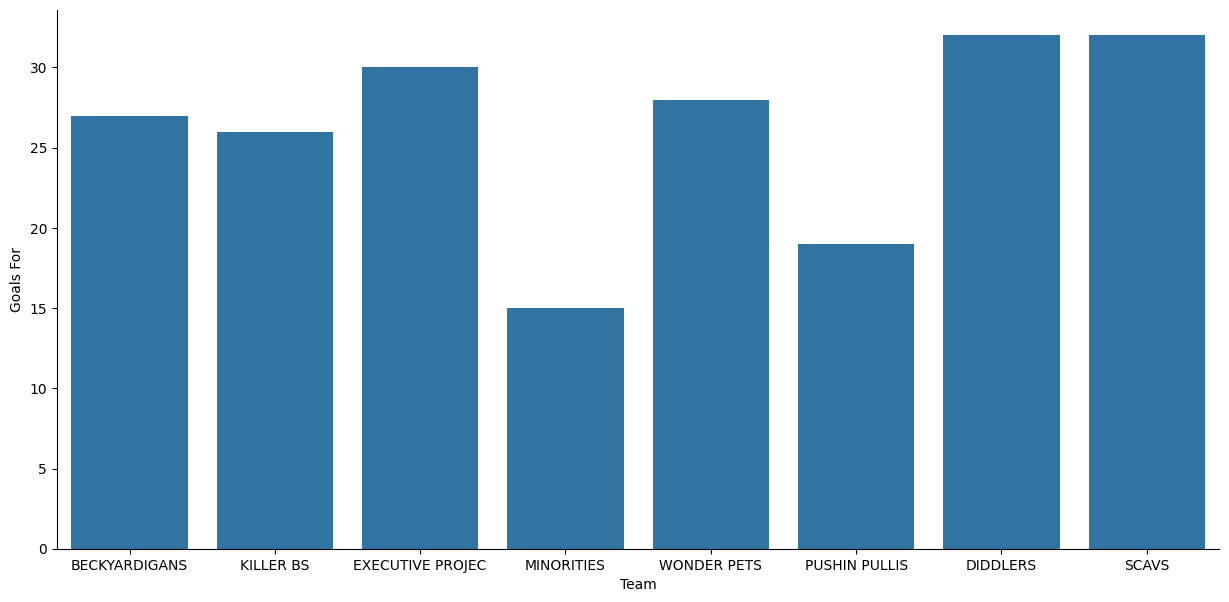

In [105]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
sns.barplot(
    data=df_bs,
    x="Team",
    y="Goals For"
)
plt.savefig("../images/goals_for_vs_team.png")
sns.despine(right=True)
plt.show()
